In [1]:
#Preliminary PCA analysis for the hell of it
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#load the data
dats_mod=["CMCC-CESM","CMCC-CM","CNRM-CM5",
          "CanESM2","GFDL-CM3","GFDL-ESM2M",
          "HadCM3","HadGEM2-CC","IPSL-CM5A",
          "MIROC-ESM","MIROC5","MPI-ESM-MR",
          "MRI-CGCM3","MRI-ESM1","NorESM1-M"]
base_dir="/global/cscratch1/sd/marielp"

df_all=pd.DataFrame()
for d in dats_mod:
    fname="{:}/{:}/STATS_SUMM/{:}_MAM_NH_summtable.csv".format(base_dir,d,d)
    fopen=pd.read_csv(fname)
    df_all=df_all.append(fopen)
    

In [3]:
#For now, we'll look at the ones that don't involve merging blobs
#target is model
features=['duration_days','mean_centlat','zonal_dist_km',"mean_area_km","mean_AI","mean_BI","zonal_speed_km"]
f2=features + ['var']
df_nomerge=df_all[df_all['merged'].str.match("NO")]

x=df_nomerge.loc[:,features].values
y=df_nomerge.loc[:,['var']].values
x = StandardScaler().fit_transform(x)

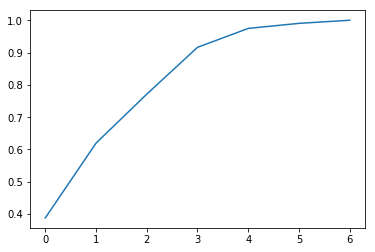

In [21]:
pca=PCA()
principalComponents=pca.fit_transform(x)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
#print(pd.DataFrame(pca.components_,columns=features))
x_w_vars=df_nomerge.loc[:,f2]
x_w_vars.reset_index(drop=True,inplace=True)

#print(pca.explained_variance_ratio_)
principalDF=pd.DataFrame(data=principalComponents)
npc=principalDF.shape[1]
cn=['PC{:}'.format(x) for x in range(1,(npc+1))]
principalDF.columns=cn
finalDF=pd.concat([principalDF,x_w_vars],axis=1)
#finalDF.columns=['principal component 1','principal component 2','model']


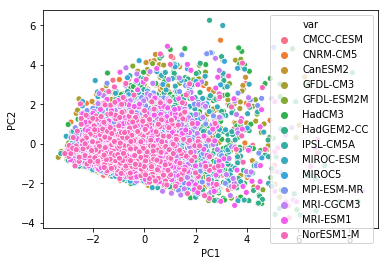

In [23]:
#Plot PC1 and PC2
sns.scatterplot(data=finalDF,x='PC1',y='PC2',hue='var')

The first 3 components explain 77% of the variance between models (PC1=0.388, PC2=0.231,PC3=0.152,PC4=0.145). When we look at the weights of the features, PC1 is dominated by AI, BI, and area (with duration, distance, and speed to a lesser extent). PC2 is dominated by distance and speed (which are correlated, so one of these might be eliminated). PC3 is mainly duration. PC4 

   mean_centlat  mean_area_km   mean_AI   mean_BI  zonal_speed_km
0      0.044714      0.594952  0.600930  0.522290        0.100640
1     -0.896927      0.114101 -0.035456 -0.092468        0.415567
2      0.408148     -0.108155 -0.071286 -0.003850        0.903671
3      0.125074      0.364705  0.364276 -0.847643        0.012284
4     -0.106277     -0.698789  0.706998 -0.012216        0.020087
[0.49999215 0.20505588 0.19532321 0.08608267 0.01354609]


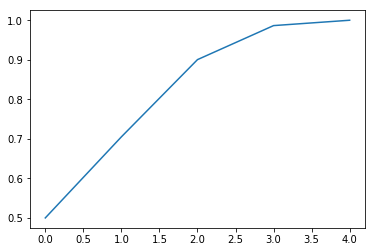

In [28]:
pca2=PCA()
features2=['mean_centlat',"mean_area_km","mean_AI","mean_BI","zonal_speed_km"]
f22=features2+['var']
x2=df_nomerge.loc[:,features2].values
x2 = StandardScaler().fit_transform(x2)
principalComponents=pca2.fit_transform(x2)
plt.plot(np.cumsum(pca2.explained_variance_ratio_))
#nexp=np.sum(pca2.explained_variance_ratio_[0:3])
print(pd.DataFrame(pca2.components_,columns=features2))
print(pca2.explained_variance_ratio_)

x2_w_vars=df_nomerge.loc[:,f22]
x2_w_vars.reset_index(drop=True,inplace=True)

#print(pca.explained_variance_ratio_)
principalDF=pd.DataFrame(data=principalComponents)
npc=principalDF.shape[1]
cn=['PC{:}'.format(x) for x in range(1,(npc+1))]
principalDF.columns=cn
finalDF=pd.concat([principalDF,x_w_vars],axis=1)

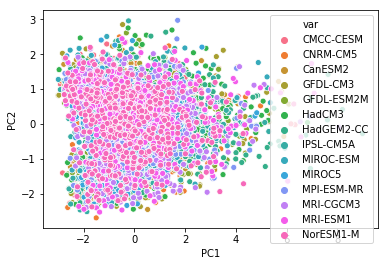

In [29]:
sns.scatterplot(data=finalDF,x='PC1',y='PC2',hue='var')

If we eliminate distance and duration and leave speed, we see again that PC1 (0.500) is dominated by AI, BI, and area. PC2 (0.205) is mainly explained by the mean centroid latitude value of the block (with speed to a lesser extent). PC3 (0.195) is the reverse, with speed having the highest weight (with mean centroid latitude to a leseer extent).

However, that's all kind of a moot point because as we see here, there's really no separation between the models...